<a href="https://colab.research.google.com/github/VesleAnne/Diploma/blob/main/Notebooks/Chatbot_BI_Encoder4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 905.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Callable, Iterable
import torch.nn as nn
from sentence_transformers import SentenceTransformer


In [ ]:
import datasets

In [ ]:
import torch.optim as optim
from transformers.optimization import get_linear_schedule_with_warmup

In [ ]:
import random
import json
import re
import numpy as np
import pandas as pd

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Reading the DataFrame
df = pd.read_csv('/content/drive/MyDrive/МФТИ/вкр/new_labeled_dataset5.csv')

df.head()

,Вопрос,Схема ответа,метка
0,Как зарегистрироваться в ЛК?,1. Для регистрации в личном кабинете перейдите...,2
1,Зачем указывать страну? |Зачем выбрирать язык?...,Кнопка с флагом в правом верхнем углу нужна дл...,2
2,Не приходит подтверждение на почту,I. Если Вам не приходит письмо для подтвержден...,2
3,Нет почты/забыл почту. Есть ли другой канал дл...,В настоящее время доступна регистрация только ...,2
4,Почему у меня все отображается не на том языке?,Выбор языка зависит от настроек браузера. \nCh...,2


In [ ]:
df.tail()

,Вопрос,Схема ответа,метка
292,Не могли бы вы соединить меня с оператором?,Переключаю на оператора,2
293,"Пожалуйста, переключите меня на реального чело...",Переключаю на оператора,2
294,Переключи меня на живого человека,Переключаю на оператора,2
295,хочу поговорить с оператором,Переключаю на оператора,2
296,позови человека,Переключаю на оператора,2


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/МФТИ/вкр/Data/labeled_dataset (1).csv')
df1.head()

,question,answer,label
0,Практика,Добрый день. Контакты отдела кадров и актуальн...,0
1,"Добрый день. Хотел бы узнать, есть ли у вас св...","Добрый день, ошибку исправили",2
2,Добрый день,Добрый день. Возможность полного удаления в на...,1
3,подскажите как корзину очистить?,Добрый день. \nПопробуйте перезапустить прилож...,2
4,"Подозреваю, что у меня на стенде из-за корзины...","Отправьте ссылку на приложение и уточните, как...",1


In [ ]:
# Переименовываем столбцы второго датасета (df2)
df.rename(columns={'Вопрос' : 'question',  'Схема ответа':'answer', 'метка':'label'}, inplace=True)
df.tail(5)

,question,answer,label
292,Не могли бы вы соединить меня с оператором?,Переключаю на оператора,2
293,"Пожалуйста, переключите меня на реального чело...",Переключаю на оператора,2
294,Переключи меня на живого человека,Переключаю на оператора,2
295,хочу поговорить с оператором,Переключаю на оператора,2
296,позови человека,Переключаю на оператора,2


In [ ]:
# Объединяем датасеты по соответствующим столбцам
merged_df = pd.concat([df, df1], ignore_index=True)
# Выводим объединенный датасет
merged_df.head(10)

,question,answer,label
0,Как зарегистрироваться в ЛК?,1. Для регистрации в личном кабинете перейдите...,2
1,Зачем указывать страну? |Зачем выбрирать язык?...,Кнопка с флагом в правом верхнем углу нужна дл...,2
2,Не приходит подтверждение на почту,I. Если Вам не приходит письмо для подтвержден...,2
3,Нет почты/забыл почту. Есть ли другой канал дл...,В настоящее время доступна регистрация только ...,2
4,Почему у меня все отображается не на том языке?,Выбор языка зависит от настроек браузера. \nCh...,2
5,Как включить подсказки? | Как просмотреть под...,1. В правом верхнем углу нажмите на пункт «Под...,2
6,Как отключить подсказки?,В окне подсказки нажмите по кнопке «Пропустить...,2
7,Что такое проект? | Зачем создавать проект? | ...,Проекты служат для группировки приложений. Нап...,2
8,Как создать новый проект?,Для добавления проекта необходимо нажать на пл...,2
9,Можно ли создать несколько проектов?,"Да, можно. Количество проектов зависит от выбр...",2


In [ ]:
merged_df.to_csv("dataset.csv", index=False)

In [ ]:
#setting a random seed and some other things for reproducibility
seed = 42

random.seed(seed)
np.random.seed(seed)

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
base_model = 'sentence-transformers/msmarco-bert-base-dot-v5'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(base_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
max_length=512

In [ ]:
class CharactersDataset(Dataset):
    def __init__(self, data_frame, tokenizer, label_column='label', max_length=256):
        self.data_frame = data_frame
        self.tokenizer = tokenizer
        self.label_column = label_column
        self.max_length = max_length
        self._prepare_data()

    def _prepare_data(self):
        input_ids = []
        attention_masks = []
        labels = []

        for _, row in self.data_frame.iterrows():
            combined_text = f"{row['question']} [SEP] {row['answer']}"
            encoded_dict = self.tokenizer.encode_plus(
                combined_text,
                add_special_tokens=True,
                max_length=self.max_length,
                padding="max_length",
                return_attention_mask=True,
                return_tensors='pt',
                truncation=True
            )

            input_ids.append(encoded_dict['input_ids'].squeeze())
            attention_masks.append(encoded_dict['attention_mask'].squeeze())
            labels.append(row[self.label_column])

        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = torch.tensor(labels)

        # Additional data preparation
        self._init_data()

    def _init_data(self) -> None:
        self.data = []
        for input_id, attention_mask, label in zip(self.input_ids, self.attention_masks, self.labels):
            data = {}
            data["Q_input"] = input_id
            data["Q_mask"] = attention_mask
            data["A_input"] = input_id
            data["A_mask"] = attention_mask
            data["label"] = label
            self.data.append(data)

    def __getitem__(self, ix: int) -> dict[str, torch.tensor]:
        return self.data[ix]

    def __len__(self) -> int:
        return len(self.data_frame)

In [ ]:
df2 = CharactersDataset(merged_df, tokenizer)

In [ ]:
merged_df.iloc[0], df2[0]

(question                         Как зарегистрироваться в ЛК?
 answer      1. Для регистрации в личном кабинете перейдите...
 label                                                       2
 Name: 0, dtype: object,
 {'Q_input': tensor([  101,  1189, 10260, 23925,  1187, 10260, 16856, 15290, 29741, 10325,
          29747, 22919, 16856, 10325, 16856, 19259, 10260, 22919, 23742, 29747,
          17432,  1182,  1190, 23925,  1029,   102,  1015,  1012,  1184, 29436,
          17432,  1195, 15290, 29741, 10325, 29747, 22919, 16856, 10260, 29751,
          15414,  1182,  1190, 10325, 29752, 18947, 14150, 29745,  1189, 10260,
          29740, 10325, 18947, 15290, 22919, 15290,  1194, 15290, 16856, 15290,
          10325, 29742, 10325, 22919, 15290,  1194, 14150,  1180, 29742, 16856,
          15290, 29747, 29748,  1024, 16770,  1024,  1013,  1013,  2665,  2850,
           2696,  1012,  3573,  1013, 21766,  1188,  1192, 10260, 29743, 29745,
          10325, 22919, 15290,  1194, 14150,  1190, 297

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_ratio = 0.8
n_total = len(df2)
n_train = int(n_total * train_ratio)
n_val = n_total - n_train

In [ ]:
train_dataset, val_dataset = random_split(df2, [n_train, n_val])

batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
def mean_pool(token_embeds: torch.tensor, attention_mask: torch.tensor) -> torch.tensor:
    in_mask = attention_mask.unsqueeze(-1).expand(token_embeds.size()).float()
    pool = torch.sum(token_embeds * in_mask, 1) / torch.clamp(in_mask.sum(1), min=1e-9)
    return pool


def encode(input_texts: list[str], tokenizer: AutoTokenizer, model: AutoModel, device: str = "cpu"
) -> torch.tensor:

    model.eval()
    tokenized_texts = tokenizer(input_texts, max_length=128,
                                padding='max_length', truncation=True, return_tensors="pt")
    token_embeds = model(tokenized_texts["input_ids"].to(device),
                         tokenized_texts["attention_mask"].to(device)).last_hidden_state
    pooled_embeds = mean_pool(token_embeds, tokenized_texts["attention_mask"].to(device))
    return pooled_embeds

In [ ]:
class Bert_model(nn.Module):
    def __init__(self, base_model, max_length: int = 128, lstm_hidden_size: int = 64, num_layers: int = 1):
        super().__init__()
        self.max_length = max_length
        self.bert_model = AutoModel.from_pretrained(base_model)
        self.bert_tokenizer = AutoTokenizer.from_pretrained(base_model)
        self.layer_norm = nn.LayerNorm(self.bert_model.config.hidden_size * 3)
        self.lstm = nn.LSTM(input_size=self.bert_model.config.hidden_size * 3,
                            hidden_size=lstm_hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.linear = nn.Linear(lstm_hidden_size, 3)

    def forward(self, data: Dataset) -> torch.Tensor:
        QC_input_ids = data["Q_input"].to(device)
        QC_attention_mask = data["Q_mask"].to(device)
        A_input_ids = data["A_input"].to(device)
        A_attention_mask = data["A_mask"].to(device)

        out_QC = self.bert_model(QC_input_ids, attention_mask=QC_attention_mask)
        out_A = self.bert_model(A_input_ids, attention_mask=A_attention_mask)

        QC_embeds = out_QC.last_hidden_state
        A_embeds = out_A.last_hidden_state

        pooled_QC_embeds = mean_pool(QC_embeds, QC_attention_mask)
        pooled_A_embeds = mean_pool(A_embeds, A_attention_mask)

        embeds = torch.cat([pooled_QC_embeds, pooled_A_embeds,
                            torch.abs(pooled_QC_embeds - pooled_A_embeds)],
                           dim=-1)

        embeds = self.layer_norm(embeds)

        # LSTM part
        lstm_out, _ = self.lstm(embeds.unsqueeze(1))  # Add a dimension for the sequence
        lstm_out = lstm_out.squeeze(1)  # Remove the added dimension

        return self.linear(lstm_out)

In [ ]:
model = Bert_model(base_model).to(device)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
gradient_accumulation_steps = 2

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6)
total_steps = len(train_dataset) // batch_size
warmup_steps = int(0.1 * total_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps - warmup_steps)

loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
def get_train_step_fn(
    model: torch.nn.Module, optimizer: torch.optim.Optimizer,
    scheduler: torch.optim.lr_scheduler.LambdaLR, loss_fn: torch.nn.CrossEntropyLoss
) -> Callable[[torch.tensor, torch.tensor], float]:

    def train_step_fn(x: torch.tensor, y: torch.tensor) -> float:
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        return loss.item()

    return train_step_fn


def get_val_step_fn(
    model: torch.nn.Module, loss_fn: torch.nn.CrossEntropyLoss
) -> Callable[[torch.tensor, torch.tensor], float]:

    def val_step_fn(x: torch.tensor, y: torch.tensor) -> float:
        model.eval()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        return loss.item()

    return val_step_fn


def mini_batch(
    dataloader: DataLoader,
    step_fn: Callable[[torch.tensor, torch.tensor], float],
    is_training: bool = True
) -> tuple[np.array, list[float]]:

    mini_batch_losses = []

    if is_training:
        print("\nTraining ...")
    else:
        print("\nValidating ...")
    n_steps = len(dataloader)
    for i, data in enumerate(dataloader):
        loss = step_fn(data, data["label"].to(device))
        mini_batch_losses.append(loss)
        if i % (batch_size * 20) == 0:
            print(f"step {i:>5}/{n_steps}, loss = {loss: .3f}")

    return np.mean(mini_batch_losses), mini_batch_losses

In [ ]:
%%time

n_epochs = 3  # mentioned in the paper

train_step_fn = get_train_step_fn(model, optimizer, scheduler, loss_fn)
val_step_fn = get_val_step_fn(model, loss_fn)

train_losses, train_mini_batch_losses = [], []
val_losses, val_mini_batch_losses = [], []

for epoch in range(1, n_epochs + 1):
    print(f"\nEpoch {epoch}/{n_epochs}")
    train_loss, _train_mini_batch_losses = mini_batch(train_dataloader, train_step_fn)
    train_mini_batch_losses += _train_mini_batch_losses
    train_losses.append(train_loss)

    with torch.no_grad():
        val_loss, _val_mini_batch_losses = mini_batch(val_dataloader, val_step_fn, is_training=False)
        val_mini_batch_losses += _val_mini_batch_losses
        val_losses.append(val_loss)
    torch.cuda.empty_cache()


Epoch 1/3

Training ...
step     0/1560, loss =  1.130
step   160/1560, loss =  0.819
step   320/1560, loss =  0.819
step   480/1560, loss =  0.738
step   640/1560, loss =  0.796
step   800/1560, loss =  0.790
step   960/1560, loss =  0.769
step  1120/1560, loss =  0.783
step  1280/1560, loss =  0.788
step  1440/1560, loss =  0.778

Validating ...
step     0/390, loss =  0.781
step   160/390, loss =  0.990
step   320/390, loss =  1.224

Epoch 2/3

Training ...
step     0/1560, loss =  0.751
step   160/1560, loss =  0.965
step   320/1560, loss =  0.776
step   480/1560, loss =  0.766
step   640/1560, loss =  0.764
step   800/1560, loss =  0.769
step   960/1560, loss =  0.750
step  1120/1560, loss =  0.978
step  1280/1560, loss =  0.762
step  1440/1560, loss =  0.760

Validating ...
step     0/390, loss =  0.781
step   160/390, loss =  0.990
step   320/390, loss =  1.224

Epoch 3/3

Training ...
step     0/1560, loss =  1.195
step   160/1560, loss =  0.997
step   320/1560, loss =  1.002


In [ ]:
model.bert_model.save_pretrained("/content/drive/MyDrive/МФТИ/вкр/BERT_2/LSTM_model")

In [ ]:
window_size = 32  # Define the window size for moving average

# Calculate moving average for train mini-batch losses
train_mb_running_loss = [np.mean(train_mini_batch_losses[i:i+window_size])
                         for i in range(len(train_mini_batch_losses)-window_size)]

# Calculate moving average for validation mini-batch losses
val_mb_running_loss = [np.mean(val_mini_batch_losses[i:i+window_size])
                       for i in range(len(val_mini_batch_losses)-window_size)]

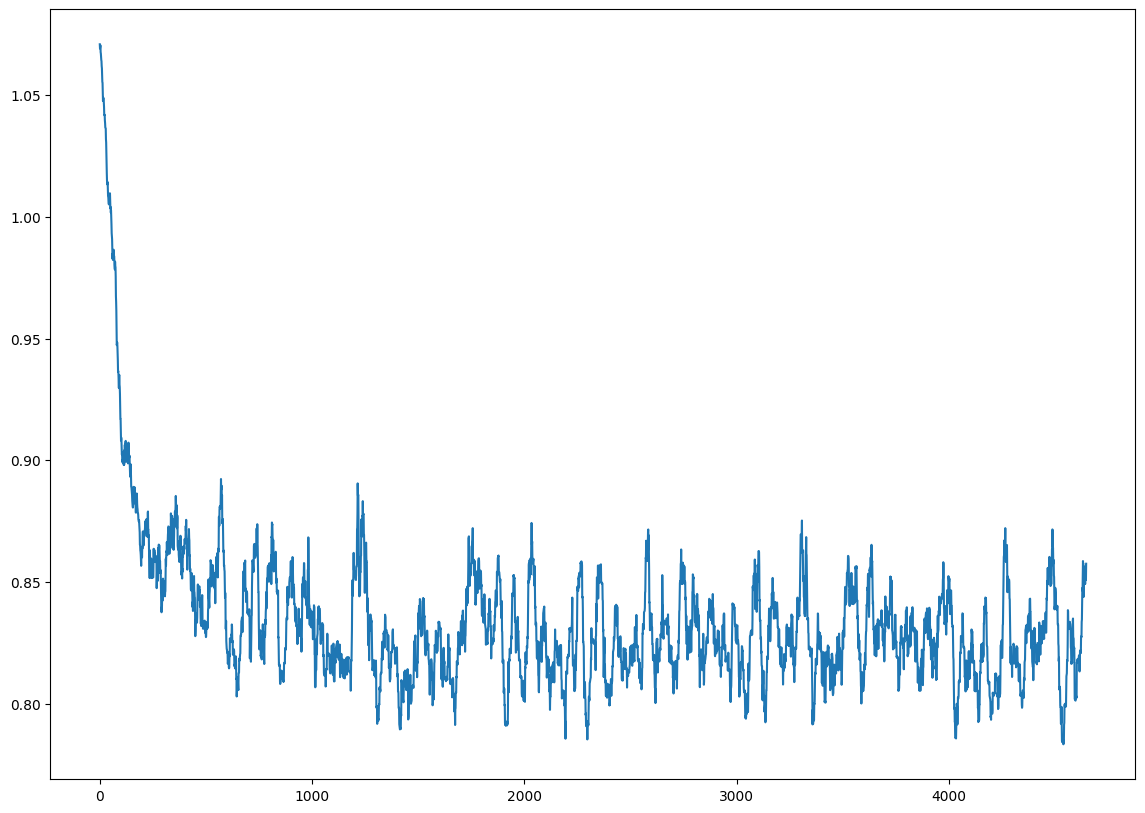

In [ ]:
fix, ax = plt.subplots(figsize=(14, 10))
ax.plot(range(len(train_mb_running_loss)), train_mb_running_loss);

In [ ]:
import pickle

# Сохраняем модель с помощью pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)